# Dbscan

Źródło: https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/53842/versions/4/screenshot.png

Kluczowy fakt: obserwacje znajdujące się w jednym klastrze mogą być bardzo "różne" - daleki od siebie
Druga ważna cecha - nie przyporządkowuje do klastrów wszystkich obserwacji

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd

In [2]:
from sklearn.cluster import DBSCAN

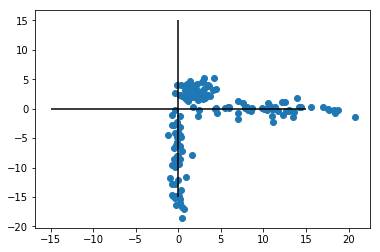

In [6]:
rnd.seed(123)
points = np.concatenate([rnd.multivariate_normal((2,3),np.array([[1,0],[0,1]]),50),
                        rnd.multivariate_normal((10,0),np.array([[30,0],[0,0.5]]),50),
                        rnd.multivariate_normal((0,-8),np.array([[0.3,0],[0,30]]),50)], axis = 0)

plt.scatter(points[:,0],points[:,1])

plt.hlines(0,-15,15)

plt.vlines(0,-15,15)
plt.show()

## Wskazówki odnoście wyboru parametrów - wyznaczanie epsilona z danych

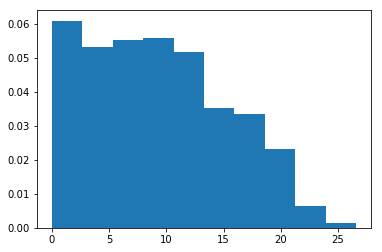

In [8]:
from sklearn.metrics.pairwise import euclidean_distances
x = euclidean_distances(points,points)

plt.hist(x[np.tril_indices(x.shape[0])],normed=True)#,cumulative=True
plt.show()

## Ocena na oka dla różnych k najblizszych sasiadów

In [9]:
k=5
y = np.sort(x,axis=1)[:,1:]
y[::10,:k]

array([[ 0.23301385,  0.37271891,  0.54032489,  0.74287846,  0.75137906],
       [ 0.30543396,  0.6382747 ,  0.7854183 ,  0.82365651,  0.86747258],
       [ 0.12588155,  0.45890474,  0.52027958,  0.80781283,  0.84463216],
       [ 0.37271891,  0.41442152,  0.44118495,  0.49738758,  0.52227744],
       [ 0.17819289,  0.24138058,  0.41879817,  0.50053067,  0.58794076],
       [ 0.77416365,  1.13162832,  1.21155214,  1.33355795,  1.3577261 ],
       [ 0.314036  ,  0.42946954,  0.53003321,  0.79541804,  0.80125882],
       [ 0.39112321,  0.45432619,  0.54980615,  1.07509231,  1.24394711],
       [ 0.29429512,  0.32764301,  0.86397041,  0.8670368 ,  0.8896627 ],
       [ 0.52475031,  0.57833157,  1.14879039,  1.19761622,  1.20944036],
       [ 0.35617842,  0.60819673,  0.63699218,  0.73012757,  0.93579894],
       [ 0.34724214,  0.36145126,  0.383606  ,  0.483339  ,  0.60689936],
       [ 0.42780463,  0.72244573,  0.77271517,  0.85922388,  1.58961251],
       [ 0.02598956,  0.54364712,  0.6

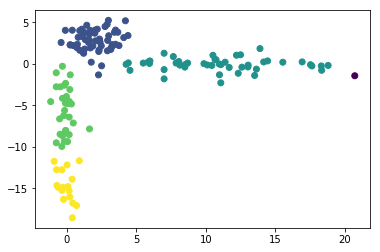

In [10]:
model = DBSCAN(1.7,3)
labels = model.fit_predict(points)
plt.scatter(points[:,0],points[:,1],c=labels+1)
plt.show()

## Ćwiczenia na dobór parametrów

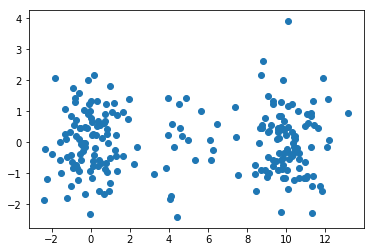

In [12]:
rnd.seed(12345)
data = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),100),
                    rnd.multivariate_normal((5,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((10,0),np.array([[1,0],[0,1]]),100)],axis=0)
plt.scatter(data[:,0],data[:,1])
plt.show()

[ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1]


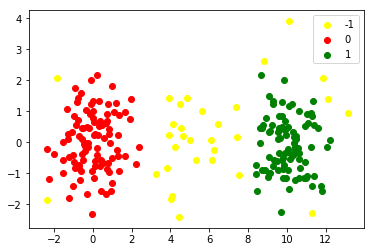

In [13]:
dbs = DBSCAN(2,80)
dbs.fit_predict(data)
print(dbs.labels_)
colors  = np.array(["red","green","blue","grey","purple","yellow"])
for i in np.unique(dbs.labels_):
    plt.scatter(data[dbs.labels_==i,0],data[dbs.labels_==i,1],c=colors[i],label= i)
plt.legend()
plt.show()

# Zadanie

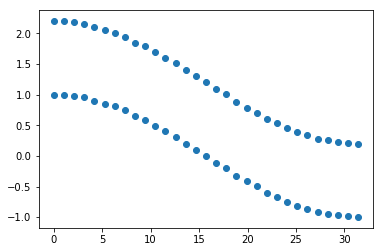

In [14]:
x = np.linspace(0,10*np.pi,31)
y = np.cos(x/10)+rnd.normal(0,0.01,len(x))

x = np.tile(x,2)
y = np.concatenate([y, y+1.2])

data = np.column_stack([x,y])
plt.scatter(data[:,0],data[:,1])
plt.show()

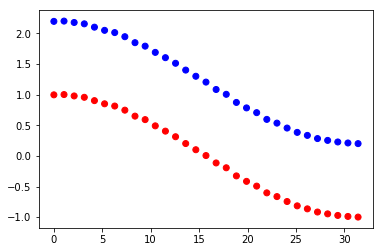

In [15]:
dbs = DBSCAN(1.1,2)
dbs.fit_predict(data)

plt.scatter(data[:,0],data[:,1],c=np.array(["red","blue","green"])[dbs.labels_])
plt.show()

# Zadanie

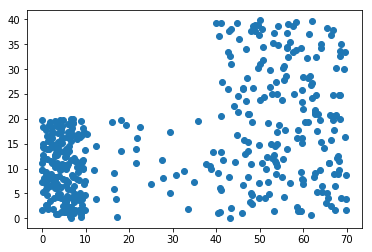

In [17]:
rnd.seed(123)
data = np.concatenate([rnd.uniform((0,0),(10,20),(200,2)),
                    rnd.uniform((40,0),(70,40),(200,2)),
                    rnd.uniform((10,0),(40,20),(30,2))],axis=0)
plt.scatter(data[:,0],data[:,1])
plt.show()

In [18]:
import seaborn as sns
colors = sns.color_palette("Set2", 20)

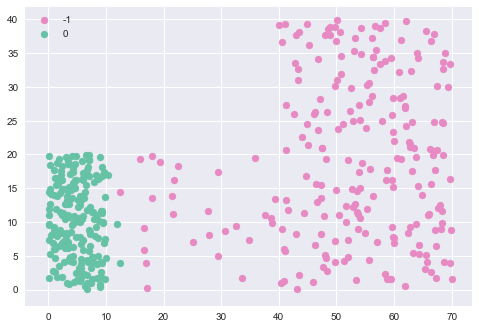

In [19]:
dbs = DBSCAN(5,60)
dbs.fit_predict(data)

for i in np.unique(dbs.labels_):
    plt.scatter(data[dbs.labels_==i,0],data[dbs.labels_==i,1],c=colors[i],label= i)
plt.legend()
plt.show()

In [20]:
data = data[dbs.labels_!=0,:]

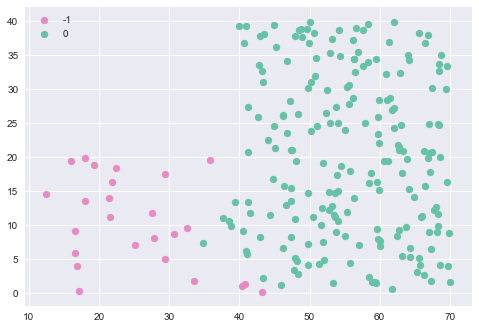

In [21]:
dbs = DBSCAN(5,10)
dbs.fit_predict(data)

for i in np.unique(dbs.labels_):
    plt.scatter(data[dbs.labels_==i,0],data[dbs.labels_==i,1],c=colors[i],label= i)
plt.legend()
plt.show()

# Zadanie
Proszę zapuścić dbscana na danych Eurowizji

In [48]:
dane = pd.read_csv("F:\\SZKOLENIE\\data_analysis\\AD01\\eurowizja.csv", sep=",")
#dane.set_index(dane.columns[0],inplace=True)
dane

m = DBSCAN(12,2)
l = m.fit_predict(dane)

In [49]:
for i in range(max(l)+1):
    print(dane.iloc[i==l,:].index)

Index(['Belgium', 'France', 'Ireland', 'Italy', 'Poland', 'Slovenia', 'Spain'], dtype='object')
Index(['Estonia', 'Lithuania'], dtype='object')
Index(['Iceland', 'Netherlands'], dtype='object')
Index(['San_Marino', 'Sweden'], dtype='object')


# Analiza skupień na danych przestrzennych
Na podstawie:

http://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/

In [57]:
dane = pd.read_csv("F:\\SZKOLENIE\\data_analysis\\AD01\\summer-travel-gps-full.csv", header=None,
                   names=['lat','lon','data','city','country'])
dane.head()

,lat,lon,data,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


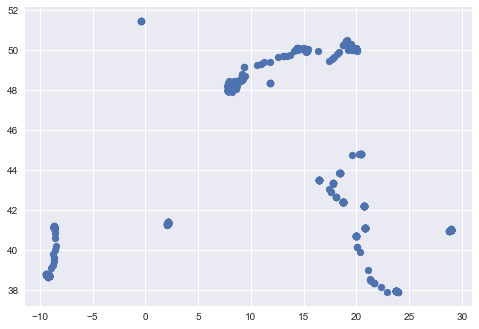

In [58]:
plt.scatter(dane.iloc[:,1],dane.iloc[:,0])
plt.show()

### Cel: zrobienie ładnej wizualizacji - wykrycie, gdzie nasz podróżnik przebywał długo (zlokalizować te miejsca na podstawie, danych GPS i przedstawić jako JEDEN PUNKT, uwzględnić w wizualizacji czas przebywania w danym miejscu) i jak się przemieszczał

In [59]:
cl = DBSCAN(1,50) # przefiltorwanie

In [60]:
labels = cl.fit_predict(dane.iloc[:,0:2])
dane["cluster"] = labels

In [61]:
dane

,lat,lon,data,city,country,cluster
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom,-1
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom,-1
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom,-1
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom,-1
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom,-1
5,51.480146,-0.441103,05/14/2014 12:23,Hounslow,United Kingdom,-1
6,51.479669,-0.441024,05/14/2014 12:38,Hounslow,United Kingdom,-1
7,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal,0
8,38.774422,-9.129195,05/14/2014 15:25,Lisbon,Portugal,0
9,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal,0


In [62]:
x =dane.loc[:,["lat","lon","cluster","city"]].loc[dane.cluster != -1]
x.describe()

,lat,lon,cluster
count,1644.000000,1644.000000,1644.000000
mean,43.063186,7.203952,2.475061
std,3.929887,10.794095,2.353430
min,37.921659,-9.425103,0.000000
25%,41.114373,2.148571,1.000000
50%,41.382714,2.173886,1.000000
75%,47.992056,15.277893,4.000000
max,50.489304,29.011215,8.000000


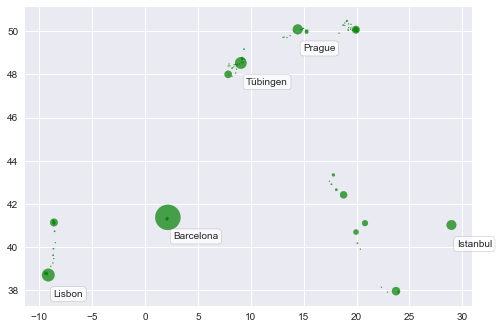

In [78]:
def f(x):
    x['n'] = len(x)
    return x

centers = dane.loc[:,["lat","lon","cluster","city"]].loc[dane.cluster != -1].groupby(["city"]).apply(f)
centers = centers.groupby(["cluster","city"]).agg({"lat":np.mean,"lon":np.mean,"n":np.median}).reset_index()

plt.scatter(centers.lon,centers.lat,s=centers.n,c="green",alpha=0.7)
for i, row in centers.iterrows():
    #print(row['city'])
    if row.n < 70:
        continue
    plt.annotate(row['city'],
    xy=(row['lon'], row['lat']),
    xytext=(row['lon'] + 0.5, row['lat'] - 1),
    size=10,   
    bbox=dict(boxstyle='round', color='gray', fc='w', alpha=0.8),
    xycoords='data'
    )
plt.show()

https://github.com/jakevdp/sklearn_pycon2015/blob/master/notebooks/04.2-Clustering-KMeans.ipynb

http://totoharyanto.staff.ipb.ac.id/files/2012/10/Building-Machine-Learning-Systems-with-Python-Richert-Coelho.pdf

http://scikit-learn.org/stable/modules/clustering.html#

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

http://www.stat.cmu.edu/~ryantibs/datamining/lectures/06-clus3.pdf